# Random Forest Prediction: Medical Insurance Cost

This project is done to predict medical insurance costs using Random Forest.

This dataset has the following features: age, sex, bmi, childern, smoker, and region

## Prediction Method

1. Dataset Information
2. Exploratory Data Analysis (EDA)
3. Preprocessing
4. Data Splitting
5. Modeling
6. Evaluation

## Library Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report

# Dataset Information

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SyahrezaAdnanAlAzhar/Prediction-Medical-Insurance-Cost/main/medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


# Exploratory Data Analysis (EDA)

In [4]:
def show_bar(data, kind, title, xlabel):
    fig, ax = plt.subplots(figsize=(8, 3))
    data.plot(kind=kind, ax=ax, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    plt.xticks(rotation=0)
    plt.show()

In [5]:
print("Nilai maksimum:", df['age'].max())
print("Nilai minimum:", df['age'].min())

Nilai maksimum: 64
Nilai minimum: 18


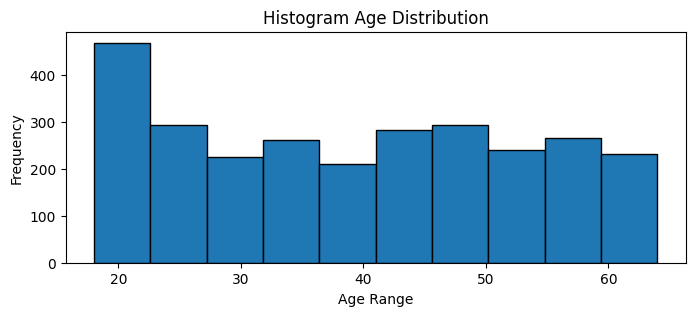

In [6]:
show_bar(df['age'], 'hist', 'Histogram Age Distribution', 'Age Range')

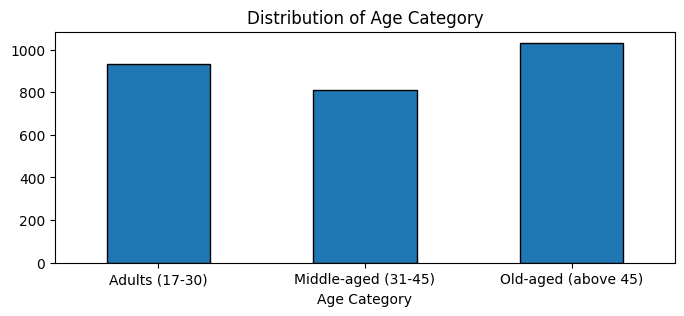

In [7]:
bins = [17, 30, 45, float('inf')]
labels = ['Adults (17-30)', 'Middle-aged (31-45)', 'Old-aged (above 45)']
frekuensi = pd.cut(df['age'], bins=bins, labels=labels, right=True).value_counts().sort_index()
show_bar(frekuensi, 'bar', 'Distribution of Age Category', 'Age Category')

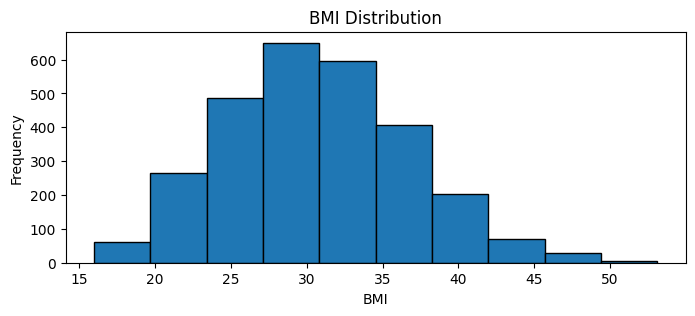

In [8]:
show_bar(df['bmi'], 'hist', 'BMI Distribution', 'BMI')

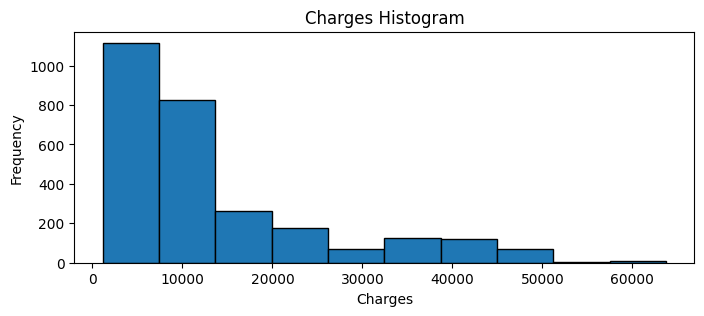

In [9]:
show_bar(df['charges'], 'hist', 'Charges Histogram', 'Charges')

Text(0.5, 1.0, 'Stroke and Average Glucose Level Box Plot')

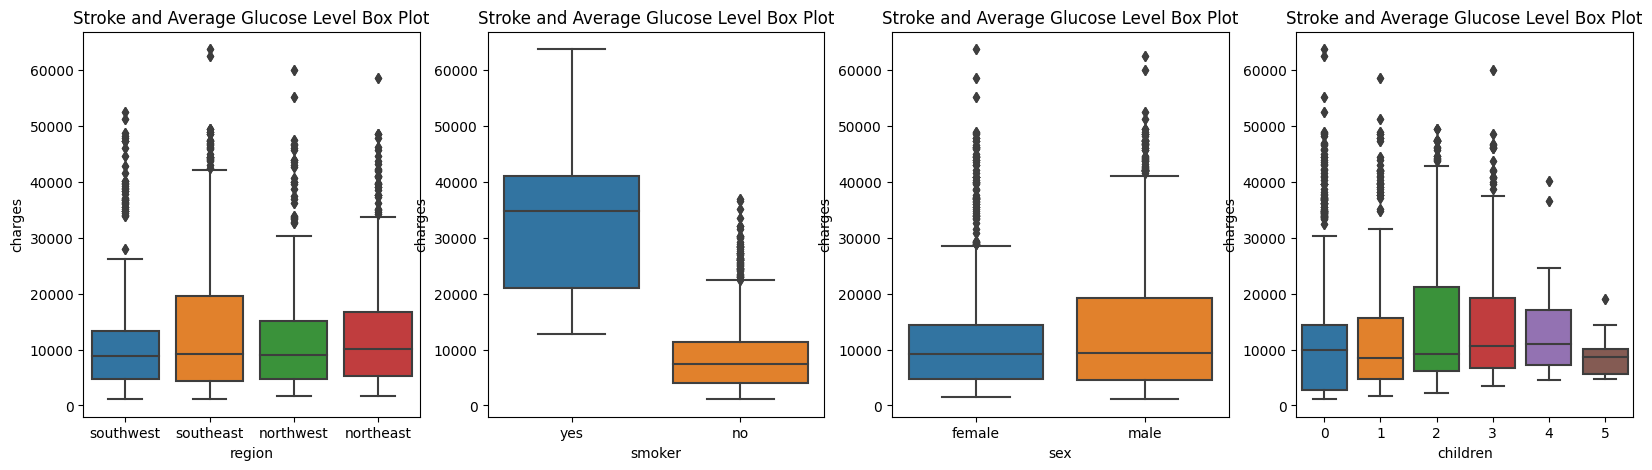

In [10]:
fig, (graph1, graph2, graph3, graph4) = plt.subplots(1,4, figsize = (20,5))

ax1 = sns.boxplot(data=df, x='region', y='charges', ax = graph1)
ax1.set_title("Stroke and Average Glucose Level Box Plot")

ax2 = sns.boxplot(data=df, x='smoker', y='charges', ax = graph2)
ax2.set_title("Stroke and Average Glucose Level Box Plot")

ax3 = sns.boxplot(data=df, x='sex', y='charges', ax = graph3)
ax3.set_title("Stroke and Average Glucose Level Box Plot")

ax4 = sns.boxplot(data=df, x='children', y='charges', ax = graph4)
ax4.set_title("Stroke and Average Glucose Level Box Plot")

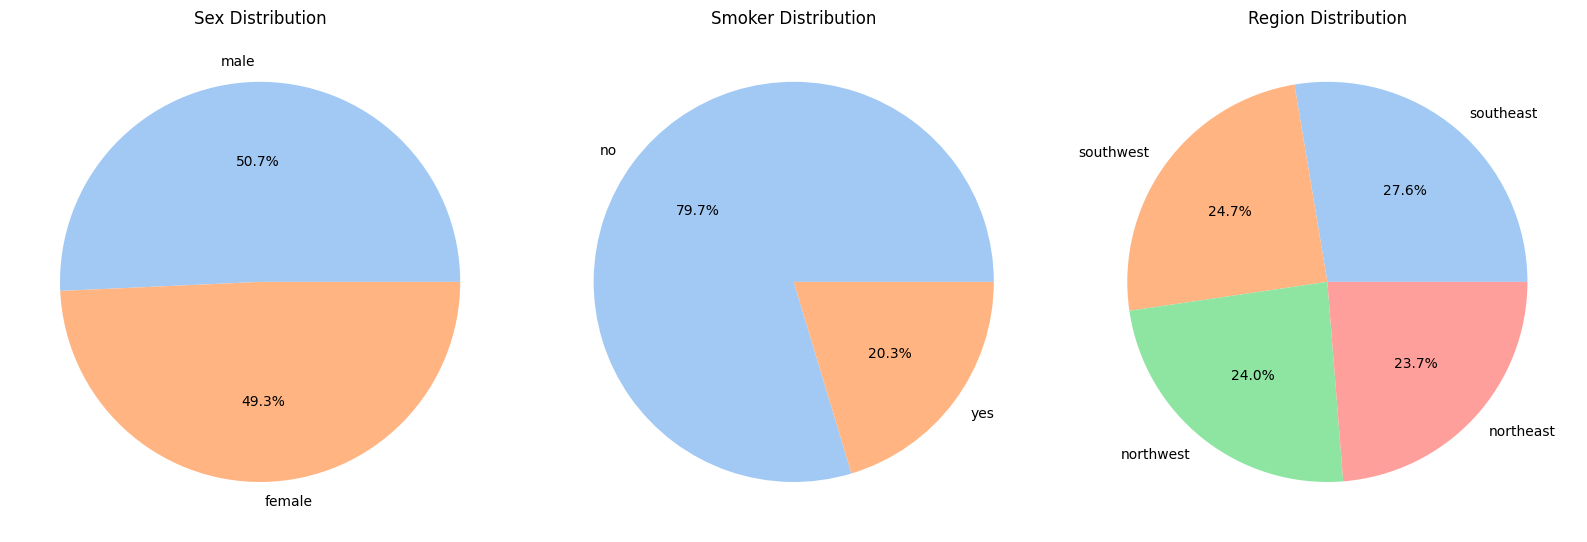

In [11]:
columns = ['sex', 'smoker', 'region']
titles = ['Sex Distribution', 'Smoker Distribution', 'Region Distribution']
fig, axs = plt.subplots(1, 3, figsize=(16, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    frequency = df[column].value_counts()
    axs[i].pie(frequency, labels=frequency.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[i].set_title(titles[i])
plt.tight_layout()
plt.show()

# Preprocessing

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [13]:
sex_dummies = pd.get_dummies(df['sex'], dtype=int, drop_first=True)
smoker_dummies = pd.get_dummies(df['smoker'], dtype=int, drop_first=True)
region_dummies = pd.get_dummies(df['region'], dtype=int, drop_first=False)

df = pd.concat([df.iloc[:, :-1], region_dummies, df.iloc[:, -1]], axis=1)
df.drop(columns=['region'], inplace=True)
df['sex'] = sex_dummies
df['smoker'] = smoker_dummies

df

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,0,0,1,0,8569.86180
2768,21,0,34.600,0,0,0,0,0,1,2020.17700
2769,19,1,26.030,1,1,0,1,0,0,16450.89470
2770,23,1,18.715,0,0,0,1,0,0,21595.38229


In [14]:
correlation = df.corr()['charges']
print(correlation)

age          0.298624
sex          0.062837
bmi          0.199846
children     0.066442
smoker       0.788783
northeast    0.009850
northwest   -0.036874
southeast    0.075652
southwest   -0.051686
charges      1.000000
Name: charges, dtype: float64


# Data Spliting

In [15]:
X = df.drop('charges', axis = 1)
y = df[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_train = y_train.values.reshape(-1)

# Modeling

In [16]:
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [17]:
param_grid = { 
    'n_estimators': [300, 500], 
    'max_features': ['log2', None], 
    'max_depth': [None, 10, 20], 
    'max_leaf_nodes': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5]
} 

In [18]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestRegressor(max_features=None, max_leaf_nodes=30, n_estimators=300)


In [23]:
model_grid = RandomForestRegressor(
    random_state=42,
    n_estimators=300,
    max_features=None,
    max_depth=None,
    max_leaf_nodes=30,
    min_samples_leaf=3
    )

model_grid.fit(X_train, y_train)

model_grid = model.predict(X_test)

# Evaluation

In [25]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Menghitung R² Score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 5836866.910269475
R² Score: 0.9608343286028915


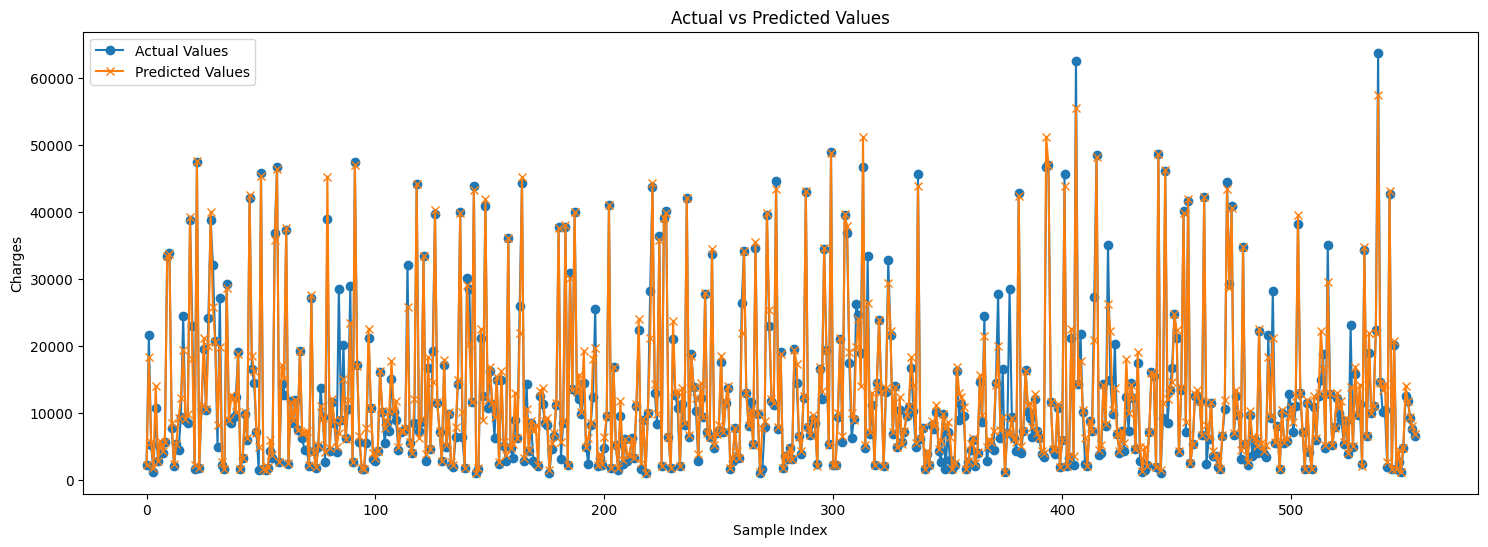

In [26]:
plt.figure(figsize=(18, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Charges')
plt.legend()
plt.show()